Found 92 EEG files.
Reading /Users/rasmusarnmark/Desktop/Sem4/fagprojekt/fagprojekt/data/326A_FG_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    5498.00 ms
        0 CTF compensation matrices available
Not setting metadata
298 matching events found
No baseline correction applied
0 projection items activated
<EpochsFIF | 298 events (all good), -0.5 – 5.498 s (baseline off), ~436.6 MiB, data loaded,
 'T1P': 30
 'T1Pn': 29
 'T3P': 30
 'T3Pn': 30
 'T12P': 30
 'T12Pn': 29
 'T13P': 30
 'T13Pn': 30
 'T23P': 30
 'T23Pn': 30>


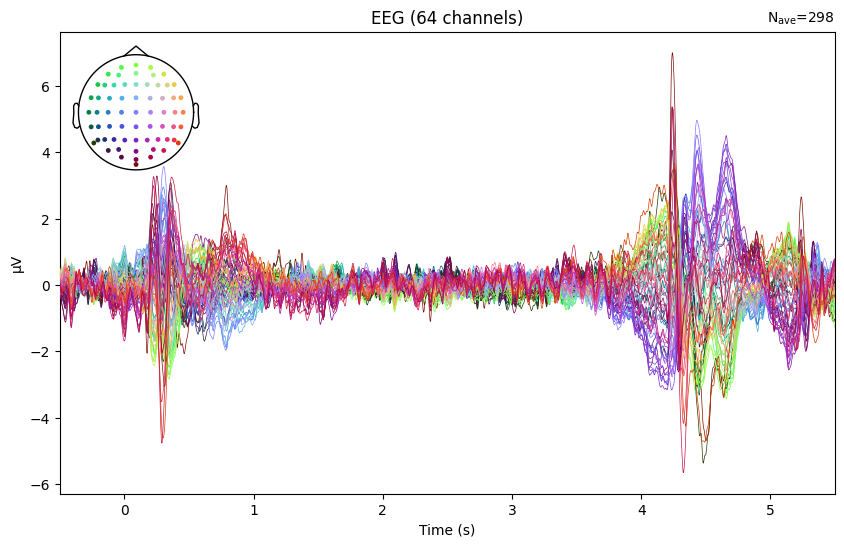

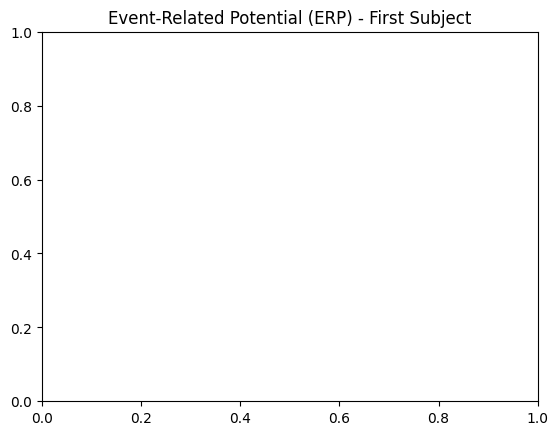

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Available columns in force_df: Index(['Triad_id', 'Block', 'Trial', 'Condition_id', 'Condition',
       'Force_level', 'TargetForce', 'Trial_time', 'Participant', 'Force',
       'dForce'],
      dtype='object')
   Triad_id  Block  Trial  Condition_id Condition  Force_level  TargetForce  \
0       301      1     10            10     T23Pn            4           28   
1       301      1     10            10     T23Pn            4           28   
2       301      1     10            10     T23Pn            4           28   
3       301      1     10            10     T23Pn            4           28   
4       301      1     10            10     T23Pn            4           28   

   Trial_time Participant     Force     dForce  
0        0.00          P1  0.013662 -27.986338  
1        0.04          P1  0.013662 -27.986338  
2        0.08      

/opt/anaconda3/envs/fp/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


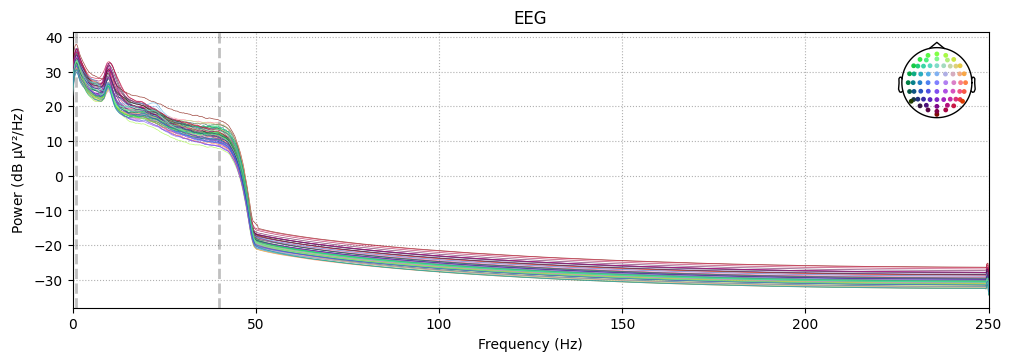

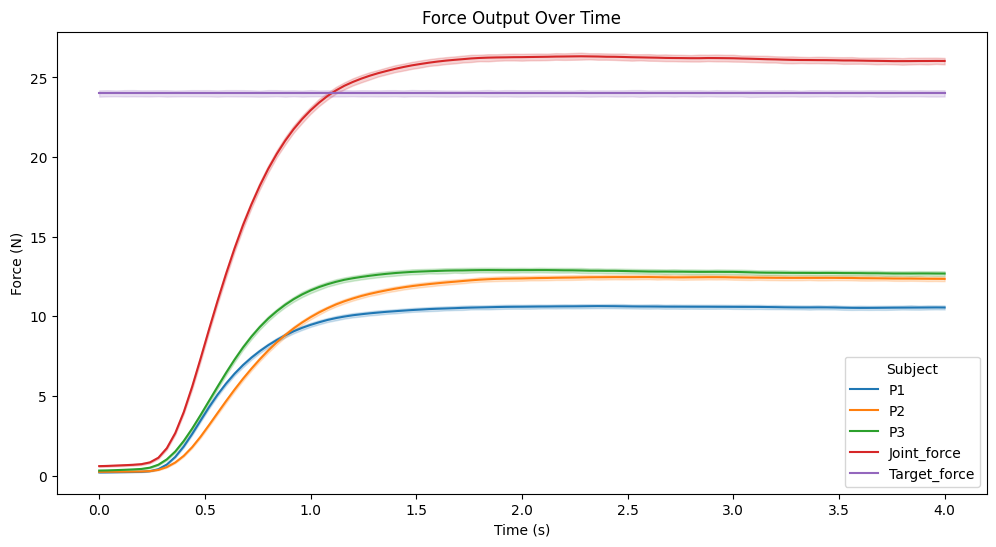

In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Define data folder path
data_folder = "data"  # Update with actual path

# Load all EEG files
eeg_files = glob.glob(os.path.join(data_folder, "*_FG_preprocessed-epo.fif"))
print(f"Found {len(eeg_files)} EEG files.")

# Load the first EEG file as an example
eeg_data = mne.read_epochs(eeg_files[0], preload=True)
print(eeg_data)

# Check if EEG data contains events
if len(eeg_data.events) == 0:
    print("Warning: No events found in EEG data. ERP plot may be empty.")

# Plot ERP for a selected subject
fig, ax = plt.subplots(figsize=(10, 6))
eeg_data.average().plot(axes=ax, show=True)
plt.title("Event-Related Potential (ERP) - First Subject")
plt.show()

# Power Spectral Density (PSD) Analysis
eeg_data.compute_psd().plot()

# Load Force Output Data (from .pkl file)
force_df = pd.read_pickle("data/forcedf.pkl")  # Update with actual path

# Check available columns
print("Available columns in force_df:", force_df.columns)
print(force_df.head())

# Ensure correct column names for plotting
expected_columns = {'time': 'Trial_time', 'force': 'Force', 'subject': 'Participant'}
missing_columns = [col for col in expected_columns.keys() if expected_columns[col] not in force_df.columns]
if missing_columns:
    print(f"Warning: Missing expected columns in force_df - {missing_columns}")
else:
    # Visualizing Force Output Over Time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=force_df['Trial_time'], y=force_df['Force'], hue=force_df['Participant'])
    plt.title('Force Output Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Force (N)')
    plt.legend(title='Subject')
    plt.show()


In [2]:
print(eeg_data)

<EpochsFIF | 298 events (all good), -0.5 – 5.498 s (baseline off), ~436.6 MiB, data loaded,
 'T1P': 30
 'T1Pn': 29
 'T3P': 30
 'T3Pn': 30
 'T12P': 30
 'T12Pn': 29
 'T13P': 30
 'T13Pn': 30
 'T23P': 30
 'T23Pn': 30>


In [7]:
eeg_data.info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

In [20]:
eeg_data = mne.read_epochs(eeg_files[1], preload=True)

epochs = eeg_data.copy() 
epochs.info

Reading /Users/rasmusarnmark/Desktop/Sem4/fagprojekt/fagprojekt/data/311A_FG_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    5498.00 ms
        0 CTF compensation matrices available
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated


<Info | 12 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2023-11-28 11:13:34 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | >
>

In [21]:
import pandas as pd

# Load the pickled DataFrames
beh_df = pd.read_pickle("data/Beh_feat_df_v2.pkl")
fg_df = pd.read_pickle("data/FG_overview_df_v2.pkl")

# Preview the content
print("Behavioral Features DF:")
print(beh_df.head())

print("\nFG Overview DF:")
print(fg_df.head())

print("\nForce DF:")
print(force_df.head())

Behavioral Features DF:
   Triad_id  Block  Trial  Condition_id Condition  Force_level  TargetForce  \
0       301      1      1             7      T13P            1           16   
1       301      1      1             7      T13P            1           16   
2       301      1      1             7      T13P            1           16   
3       301      1      1             7      T13P            1           16   
4       301      1      1             7      T13P            1           16   

  Participant        Feature     Value  Subject_id Friend_status        Age  \
0          P1        Latency  2.560000        1049           Yes  22.239562   
1          P1      Stability  1.320000        1049           Yes  22.239562   
2          P1        Success  1.000000        1049           Yes  22.239562   
3          P1  RelativeForce  0.721505        1049           Yes  22.239562   
4          P1   cVariability  0.045401        1049           Yes  22.239562   

  Gender  Class_friends  C

In [26]:
fg_df

,Subject_id,Exp_id,Friend_status,EEG_device,Force_device,Force_port,Age,Gender,Class_friends,Class_close_friends,Friends,Close_friends,Triad_id,Participant,tFriends,tClose_friends,All_friends,tClass,rClass
0,1049,301A,Yes,1,1,1,22.239562,F,3,6,9,14,301,P1,12,20,32,9,0.666667
1,1029,301B,No,2,3,2,24.331280,M,3,1,8,5,301,P2,11,6,17,4,0.250000
2,1028,301C,Yes,3,4,3,21.670089,M,8,4,9,4,301,P3,17,8,25,12,0.333333
3,1064,302A,Yes,1,1,1,22.009582,M,14,8,11,5,302,P1,25,13,38,22,0.363636
4,1024,302B,Yes,2,3,2,21.355236,M,5,7,6,10,302,P2,11,17,28,12,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6069,330B,No,2,3,2,19.373032,F,14,3,17,17,330,P2,31,20,51,17,0.176471
88,6048,330C,Yes,3,4,3,19.841205,M,13,11,25,26,330,P3,38,37,75,24,0.458333
89,6015,331A,Yes,1,1,1,20.052019,M,9,4,14,13,331,P1,23,17,40,13,0.307692
90,6183,331B,Yes,2,3,2,18.863792,M,22,6,25,12,331,P2,47,18,65,28,0.214286
